# TensorRider Algorithm

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorlayer as tl

In [2]:
sess = tf.InteractiveSession()

In [3]:
def rgb2mono(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    # mono = 0.2989 * r + 0.5870 * g + 0.1140 * b
    mono = 0.5 * r + 0.25 * g + 0.25 * b
    return mono

In [4]:
def prepareDataArrays(iterator):
    X = np.zeros(4800)
    y = np.zeros(1)
    recordCounter = 0;

    for string_record in iterator:
        recordCounter += 1

        example = tf.train.Example()
        example.ParseFromString(string_record)
        imageString = (example.features.feature['image'].bytes_list.value[0])
        label = (example.features.feature['label'].int64_list.value[0])

        image = np.fromstring(imageString, dtype=np.uint8)
        image = image.reshape((60, 80, 3))
        image = rgb2mono(image)
        image = image.reshape((4800))

        X = np.vstack((X,image))
        y = np.append(y,label)
        if recordCounter % 100 == 0:
            print(recordCounter,end = '->')

    y = y.reshape((recordCounter + 1,))
    y = y / 40
    return X, y

In [5]:
trainIterator = tf.python_io.tf_record_iterator(path="train.tfrecords")
valIterator = tf.python_io.tf_record_iterator(path="val.tfrecords")
testIterator = tf.python_io.tf_record_iterator(path="test.tfrecords")

# TFRecords -> Arrays

In [6]:
print("\nTrain...")
X_train, y_train = prepareDataArrays(trainIterator)
print("\nVal...")
X_val, y_val = prepareDataArrays(valIterator)
print("\nTest...")
X_test, y_test = prepareDataArrays(testIterator)


Train...
100->

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


200->300->400->500->600->700->800->900->1000->1100->1200->1300->1400->1500->1600->1700->1800->1900->2000->2100->2200->2300->2400->2500->2600->2700->2800->2900->3000->3100->3200->3300->3400->3500->3600->3700->3800->3900->4000->4100->4200->4300->4400->4500->4600->4700->4800->4900->5000->5100->5200->5300->5400->5500->5600->5700->5800->5900->6000->6100->6200->6300->6400->6500->6600->6700->6800->6900->7000->7100->7200->7300->7400->7500->7600->7700->7800->7900->8000->8100->8200->8300->8400->8500->8600->8700->8800->8900->9000->9100->9200->9300->9400->9500->9600->9700->9800->9900->10000->10100->10200->10300->10400->10500->10600->10700->10800->10900->11000->11100->11200->11300->11400->11500->11600->11700->11800->11900->12000->12100->12200->12300->12400->12500->12600->12700->12800->12900->13000->13100->13200->13300->13400->13500->
Val...
100->200->300->400->500->600->700->800->900->1000->1100->1200->1300->1400->1500->1600->1700->1800->1900->2000->2100->2200->2300->2400->2500->2600->2700->
Test..

# Arrays -> NPZ File

In [7]:
np.savez("arrays_reg.npz", xtr = X_train, ytr = y_train, xval = X_val, yval = y_val, xt = X_test, yt = y_test)

# NPZ File -> Arrays

In [6]:
npRecall = np.load("arrays_reg.npz")
X_train = npRecall["xtr"]
y_train = npRecall["ytr"]
X_val = npRecall["xval"]
y_val = npRecall["yval"]
X_test = npRecall["xt"]
y_test = npRecall["yt"]

# Visualization

In [8]:
y_train

array([ 0.   ,  0.   ,  0.   , ...,  0.   , -0.125, -0.15 ])

(array([1.200e+01, 3.500e+01, 4.460e+02, 1.443e+03, 1.401e+03, 1.498e+03,
        5.870e+02, 1.020e+02, 3.808e+03, 2.760e+02, 6.460e+02, 1.158e+03,
        1.355e+03, 6.200e+02, 1.790e+02, 2.100e+01, 5.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.7    , -0.61625, -0.5325 , -0.44875, -0.365  , -0.28125,
        -0.1975 , -0.11375, -0.03   ,  0.05375,  0.1375 ,  0.22125,
         0.305  ,  0.38875,  0.4725 ,  0.55625,  0.64   ,  0.72375,
         0.8075 ,  0.89125,  0.975  ]),
 <a list of 20 Patch objects>)

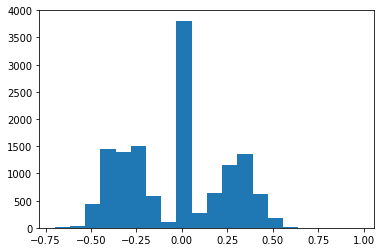

In [30]:
plt.hist(y_train, 20)
# plt.hist(y_val, 20)
# plt.hist(y_test, 20)

# Define the Neural Network

In [32]:
x = tf.placeholder(tf.float32, shape=[None, 4800], name='x')
y_ = tf.placeholder(tf.float32, shape=[None], name='y_')

In [33]:
network = tl.layers.InputLayer(x, name='input')
network = tl.layers.DropoutLayer(network, keep=0.8, name='drop1')
network = tl.layers.DenseLayer(network, 2048, tf.nn.relu, name='relu1')
# network = tl.layers.DropoutLayer(network, keep=0.5, name='drop2')
network = tl.layers.DenseLayer(network, 1024, tf.nn.relu, name='relu2')
# network = tl.layers.DropoutLayer(network, keep=0.5, name='drop3')
# network = tl.layers.DenseLayer(network, 1024, tf.nn.relu, name='relu3')
# network = tl.layers.DenseLayer(network, 1024, tf.nn.relu, name='relu4')
network = tl.layers.DenseLayer(network, 512, tf.nn.relu, name='relu5')
network = tl.layers.DenseLayer(network, 256, tf.nn.relu, name='relu6')
network = tl.layers.DenseLayer(network, n_units=1, act=tf.identity, name='output')

[TL] InputLayer  input: (?, 4800)
[TL] DropoutLayer drop1: keep:0.800000 is_fix:False
[TL] DenseLayer  relu1: 2048 relu
[TL] DenseLayer  relu2: 1024 relu
[TL] DenseLayer  relu5: 512 relu
[TL] DenseLayer  relu6: 256 relu
[TL] DenseLayer  output: 1 identity


In [10]:
y = network.outputs
cost = tl.cost.mean_squared_error(tf.argmax(y, 1), y_, name='cost')
correct_prediction = tf.equal(tf.argmax(y, 1), y_)
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
y_op = tf.argmax(tf.nn.softmax(y), 1)

In [11]:
train_params = network.all_params
train_op = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost, var_list=train_params)

In [12]:
tl.layers.initialize_global_variables(sess)

In [13]:
network.print_params()

[TL]   param   0: relu1/W:0            (4800, 2048)       float32_ref (mean: 1.4310237020254135e-05, median: -5.945898010395467e-06, std: 0.08795341849327087)   
[TL]   param   1: relu1/b:0            (2048,)            float32_ref (mean: 0.0               , median: 0.0               , std: 0.0               )   
[TL]   param   2: relu2/W:0            (2048, 1024)       float32_ref (mean: 1.4902308066666592e-05, median: 4.604891364579089e-05, std: 0.08796718716621399)   
[TL]   param   3: relu2/b:0            (1024,)            float32_ref (mean: 0.0               , median: 0.0               , std: 0.0               )   
[TL]   param   4: relu5/W:0            (1024, 512)        float32_ref (mean: -7.194335921667516e-05, median: 2.5876426661852747e-05, std: 0.08799204975366592)   
[TL]   param   5: relu5/b:0            (512,)             float32_ref (mean: 0.0               , median: 0.0               , std: 0.0               )   
[TL]   param   6: relu6/W:0            (512, 256)       

In [14]:
network.print_layers()

[TL]   layer   0: drop1/mul:0          (?, 4800)          float32
[TL]   layer   1: relu1/Relu:0         (?, 2048)          float32
[TL]   layer   2: relu2/Relu:0         (?, 1024)          float32
[TL]   layer   3: relu5/Relu:0         (?, 512)           float32
[TL]   layer   4: relu6/Relu:0         (?, 256)           float32
[TL]   layer   5: output/Identity:0    (?, 7)             float32


# (Optional) Setting up TensorBoard

In [15]:
acc_summ = tf.summary.scalar('acc', acc)  
cost_summ = tf.summary.scalar('cost', cost)  
summary = tf.summary.merge_all()  
writer = tf.summary.FileWriter('./logs')  
writer.add_graph(sess.graph) 

# Start Training

In [15]:
tl.utils.fit(
    sess, network, train_op, cost, X_train, y_train, x, y_, acc=acc, batch_size=100, n_epoch=500, print_freq=5, X_val=X_val, y_val=y_val, eval_train=False, tensorboard=False)

[TL] Start training the network ...
[TL] Epoch 1 of 500 took 2.957723s
[TL]    val loss: 306.127439
[TL]    val acc: 0.732963
[TL] Epoch 5 of 500 took 2.477292s
[TL]    val loss: 142.620600
[TL]    val acc: 0.646667
[TL] Epoch 10 of 500 took 2.271978s
[TL]    val loss: 61.790393
[TL]    val acc: 0.693333
[TL] Epoch 15 of 500 took 2.291489s
[TL]    val loss: 59.932724
[TL]    val acc: 0.602593
[TL] Epoch 20 of 500 took 2.316059s
[TL]    val loss: 51.320483
[TL]    val acc: 0.494074
[TL] Epoch 25 of 500 took 2.384625s
[TL]    val loss: 26.097169
[TL]    val acc: 0.547037
[TL] Epoch 30 of 500 took 2.393724s
[TL]    val loss: 20.529029
[TL]    val acc: 0.641111
[TL] Epoch 35 of 500 took 2.382494s
[TL]    val loss: 18.827669
[TL]    val acc: 0.736667
[TL] Epoch 40 of 500 took 2.454937s
[TL]    val loss: 18.191836
[TL]    val acc: 0.685185
[TL] Epoch 45 of 500 took 2.546659s
[TL]    val loss: 23.557425
[TL]    val acc: 0.483333
[TL] Epoch 50 of 500 took 2.470768s
[TL]    val loss: 15.023940


[TL]    val acc: 0.730370
[TL] Epoch 455 of 500 took 2.265413s
[TL]    val loss: 0.962322
[TL]    val acc: 0.740741
[TL] Epoch 460 of 500 took 2.298908s
[TL]    val loss: 0.885788
[TL]    val acc: 0.727407
[TL] Epoch 465 of 500 took 2.283476s
[TL]    val loss: 0.915414
[TL]    val acc: 0.729259
[TL] Epoch 470 of 500 took 2.291841s
[TL]    val loss: 0.926052
[TL]    val acc: 0.716667
[TL] Epoch 475 of 500 took 2.307572s
[TL]    val loss: 0.895707
[TL]    val acc: 0.741111
[TL] Epoch 480 of 500 took 2.327882s
[TL]    val loss: 0.899451
[TL]    val acc: 0.738148
[TL] Epoch 485 of 500 took 2.286065s
[TL]    val loss: 0.903449
[TL]    val acc: 0.741111
[TL] Epoch 490 of 500 took 2.358186s
[TL]    val loss: 0.893328
[TL]    val acc: 0.731111
[TL] Epoch 495 of 500 took 2.282546s
[TL]    val loss: 0.939815
[TL]    val acc: 0.723704
[TL] Epoch 500 of 500 took 2.350995s
[TL]    val loss: 0.917578
[TL]    val acc: 0.744074
[TL] Total training time: 1192.171118s


# Test the Neural Network

In [16]:
tl.utils.test(sess, network, acc, X_test, y_test, x, y_, batch_size=None, cost=cost)

[TL] Start testing the network ...
[TL]    test loss: 0.718053
[TL]    test acc: 0.754356


# Save the Trained Model

In [17]:
tl.files.save_npz(network.all_params, name='model_reg.npz')
sess.close()

[TL] [*] model.npz saved


# Load the Trained Model

In [15]:
tl.files.load_and_assign_npz(sess=sess, name='model_reg.npz', network=network)

[TL] [*] Load model.npz SUCCESS!


# Controlling TensorRider Using the Generated Model

In [16]:
import cv2
from IPython import display
import urllib.request
import numpy as np
import socket
import threading
from time import ctime,sleep
import string

remoteImage = np.array([])
stream = urllib.request.urlopen('http://192.168.73.73:8080/?action=stream&ignored.mjpg')
bytes = bytes()

In [17]:
def Image_Refreshing_Thread():
    global remoteImage
    global stream
    global bytes
    while True:
        bytes += stream.read(1024)
        a = bytes.find(b'\xff\xd8')
        b = bytes.find(b'\xff\xd9')
        if a != -1 and b != -1:
            jpg = bytes[a:b+2]
            bytes = bytes[b+2:]
            i = cv2.imdecode(np.fromstring(jpg, dtype=np.uint8), cv2.IMREAD_COLOR)
            i = rgb2mono(i)
            remoteImage = i.reshape((1,4800))

In [18]:
def Controlling_Thread():
    global remoteImage
    addr=('192.168.73.73',51423)
    s=socket.socket(socket.AF_INET,socket.SOCK_DGRAM)
    while True:
        direction = tl.utils.predict(sess, network, remoteImage, x, y_op, batch_size=None)
        msgCtrl_Udp = str(25) + "," + str((direction[0] - 3) * 20)
#         print(msgCtrl_Udp)
        s.sendto(msgCtrl_Udp.encode('utf-8'), addr)
        sleep(0.1)

In [19]:
RefreshImageThread = threading.Thread(target = Image_Refreshing_Thread)
RefreshImageThread.start()

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


In [20]:
ControllingThread = threading.Thread(target = Controlling_Thread)
ControllingThread.start()

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':
